In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import collections
import pandas as pd
from collections import Counter

In [4]:
def replaceEmptyValue(value):
    return 0 if value == '' else value

rawData = csv.DictReader(open('Data/WorldEnergyConsumption.csv', 'rt', encoding='utf-8'))
consumptionFile = open('Data/ConsumptionData', 'w', newline='', encoding='utf-8')
productionFile = open('Data/ProductionData', 'w', newline='', encoding='utf-8')
populationFile = open('Data/PopulationData', 'w', newline='', encoding='utf-8')

consumptionWriter = csv.writer(consumptionFile)
productionWriter = csv.writer(productionFile)
populationWriter = csv.writer(populationFile)

fuelTypes = ["biofuel", "coal", "fossil", "gas", "hydro", "low_carbon", "nuclear", "oil", "solar", "wind"]
ignore = ["World", "Europe", "Middle East", "Africa", "Eastern Africa", "Middle Africa", "Western Africa", "Asia Pacific", "Central America", "North America", "South & Central America"]

consumptionWriter.writerow(["country", "year"] + fuelTypes)
productionWriter.writerow(["country", "year"] + fuelTypes)
populationWriter.writerow(["country", "year", "population"])
countries = set()

for row in rawData:
    if row["country"] in ignore or int(row["year"]) < 1965 or int(row["year"]) == 2020:
        continue
    
    consumptionRow = []
    productionRow = []
    populationRow = []
    
    countries.add(row["country"])
    
    for key in ["country", "year"] + [x+"_consumption" for x in fuelTypes]:
        consumptionRow.append(replaceEmptyValue(row[key]))
    
    for key in ["country", "year"] + [x+"_electricity" for x in fuelTypes]:
        productionRow.append(replaceEmptyValue(row[key]))
        
    for key in ["country", "year", "population"]:
        populationRow.append(replaceEmptyValue(row[key]))

    consumptionWriter.writerow(consumptionRow)
    productionWriter.writerow(productionRow)
    populationWriter.writerow(populationRow)

In [5]:
rawConsumptionData = pd.read_csv('Data/ConsumptionData')
summedData = rawConsumptionData.where(rawConsumptionData["year"] == 2019).dropna().sum()
del summedData["year"]
del summedData["country"]
print(summedData)

biofuel         1037.937
coal           44721.086
fossil        130891.908
gas            44354.083
hydro           9298.445
low_carbon     24051.217
nuclear         6917.967
oil            54261.448
solar           1742.961
wind            3496.505
dtype: object


In [6]:
rawConsumptionData = pd.read_csv('Data/ConsumptionData')
summedData = rawConsumptionData.where(rawConsumptionData["year"] == 2019).dropna().sum()
del summedData["year"]
del summedData["country"]
print(summedData)

biofuel         1037.937
coal           44721.086
fossil        130891.908
gas            44354.083
hydro           9298.445
low_carbon     24051.217
nuclear         6917.967
oil            54261.448
solar           1742.961
wind            3496.505
dtype: object


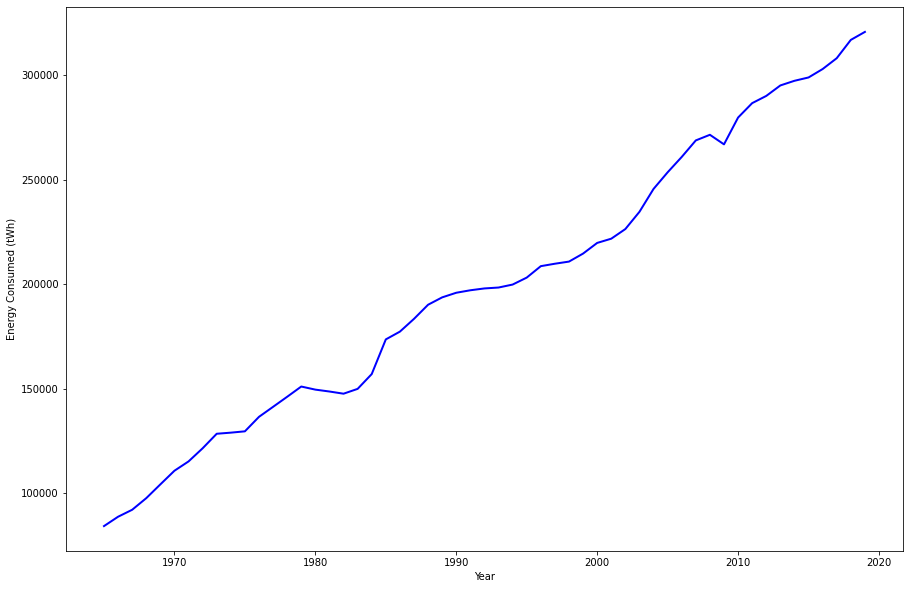

84273.34999999999
320773.557


In [7]:
def totalConsumption(year):
    rawConsumptionData = pd.read_csv('Data/ConsumptionData')
    summedData = rawConsumptionData.where(rawConsumptionData["year"] == year).dropna().sum()
    del summedData["year"]
    del summedData["country"]
    return summedData.sum()
    
sumArr = dict()
for i in range(1965, 2020):
    sumArr[i] = totalConsumption(i)
    
plt.figure(figsize=(15,10))
plt.plot(sumArr.keys(), sumArr.values(), color="b", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Energy Consumed (tWh)")
plt.ticklabel_format(style='plain')
plt.show();

print(sumArr[1965])
print(sumArr[2019])

In [8]:
def getTotalEnergyUsage(year, country):
    rawConsumptionData = pd.read_csv('Data/ConsumptionData')
    summedData = rawConsumptionData.where((rawConsumptionData["year"] == year) & (rawConsumptionData["country"] == country)).dropna().sum()
    del summedData["year"]
    del summedData["country"]
    #print(year, " - ", summedData.sum())
    return summedData.sum()

increases = dict()
index = 0
for c in countries:
    index += 1
    sums = []
    for y in range(1965, 2020):
        num = getTotalEnergyUsage(y, c)
        if num != 0:
            sums.append(num)
            
    if len(sums) < 5:
        continue
    
    percentages = []
    for i in range(len(sums)-1):
        percentages.append((sums[i+1] - sums[i]) / sums[i])
    increases[c] = np.mean(percentages)

KeyboardInterrupt: 

In [20]:
rawConsumptionData = pd.read_csv('Data/ConsumptionData')
groupedData = rawConsumptionData.groupby("year").sum()
print(groupedData)

       biofuel       coal      fossil        gas     hydro  low_carbon  \
year                                                                     
1965     0.000  19283.930   32674.309   7519.500  2245.478    2361.213   
1966     0.000  19594.118   34356.794   8224.340  2373.577    2518.472   
1967     0.000  19380.759   35556.500   8866.531  2438.023    2601.083   
1968     0.000  19576.217   37939.424   9656.257  2535.396    2732.844   
1969     0.000  20123.034   40748.771  10556.993  2662.340    2888.332   
1970     0.000  20338.807   43398.471  11508.017  2768.557    3046.710   
1971     0.000  20295.961   44900.477  12359.545  2907.813    3271.306   
1972     0.000  20582.615   47286.821  13034.775  3059.981    3534.842   
1973     0.000  21116.068   50058.293  13735.662  3110.074    3722.031   
1974     0.000  21134.745   49293.241  14157.530  3414.164    4185.531   
1975     0.000  21564.012   48721.253  14394.894  3476.445    4515.630   
1976     0.000  22195.237   51650.825 

[2245.478, 81760.696]


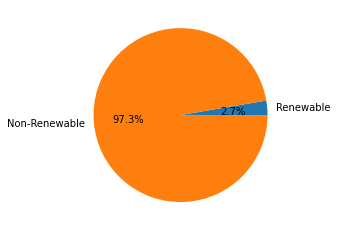

[5533.312, 189698.1]


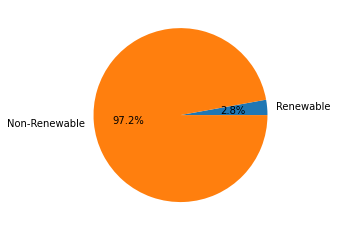

[11756.392, 287854.556]


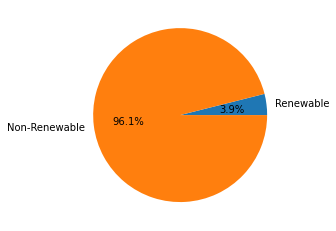

[12465.555, 290982.33400000003]


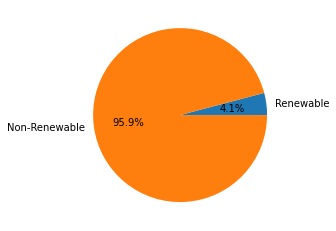

[13228.925, 295474.109]


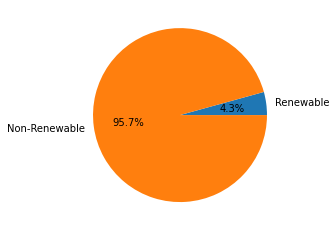

[14021.765, 303420.387]


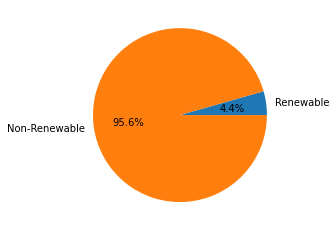

[14836.797999999999, 306464.54999999993]


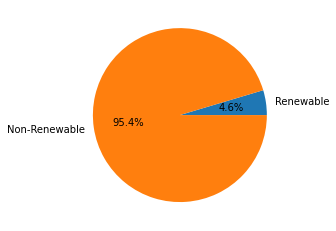

In [21]:
def drawPieChart(year):
    rawConsumptionData = pd.read_csv('Data/ConsumptionData')
    summedData = rawConsumptionData.where(rawConsumptionData["year"] == year).dropna().sum()
    del summedData["year"]
    del summedData["country"]
    renewable = summedData["hydro"] + summedData["solar"] + summedData["wind"]
    nonRenewable = summedData["biofuel"] + summedData["coal"] + summedData["fossil"] + summedData["gas"] + summedData["low_carbon"] + summedData["nuclear"] + summedData["oil"]
    
    print([renewable, nonRenewable])
    plt.pie([renewable, nonRenewable], labels = ["Renewable", "Non-Renewable"], autopct='%1.1f%%')
    plt.show();
    
drawPieChart(1965)
drawPieChart(1990)
drawPieChart(2015)
drawPieChart(2016)
drawPieChart(2017)
drawPieChart(2018)
drawPieChart(2019)